In [3]:
# Trade Flow Insights & Product Movement Analysis Using Python & Seaborn”


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import os

file_path = "/content/micro_data_trade_2022.xlsx"

if os.path.exists(file_path):
    df=pd.read_excel(file_path)
    monthly_trade=df.groupby(['Year', 'Month', 'Tradeflow'])["Tradevalue_USD"].sum().reset_index()
    monthly_trade['date'] = pd.to_datetime(monthly_trade['Year'].astype(str) + '-' + monthly_trade['Month'].astype(str), format='%Y-%B')
else:
    print(f"Error: File not found at {file_path}. Please upload the file or provide the correct path.")

# New section

In [8]:
monthly_trend = df.groupby(['Year', 'Month', 'Tradeflow'])['Tradevalue_USD'].sum().reset_index()

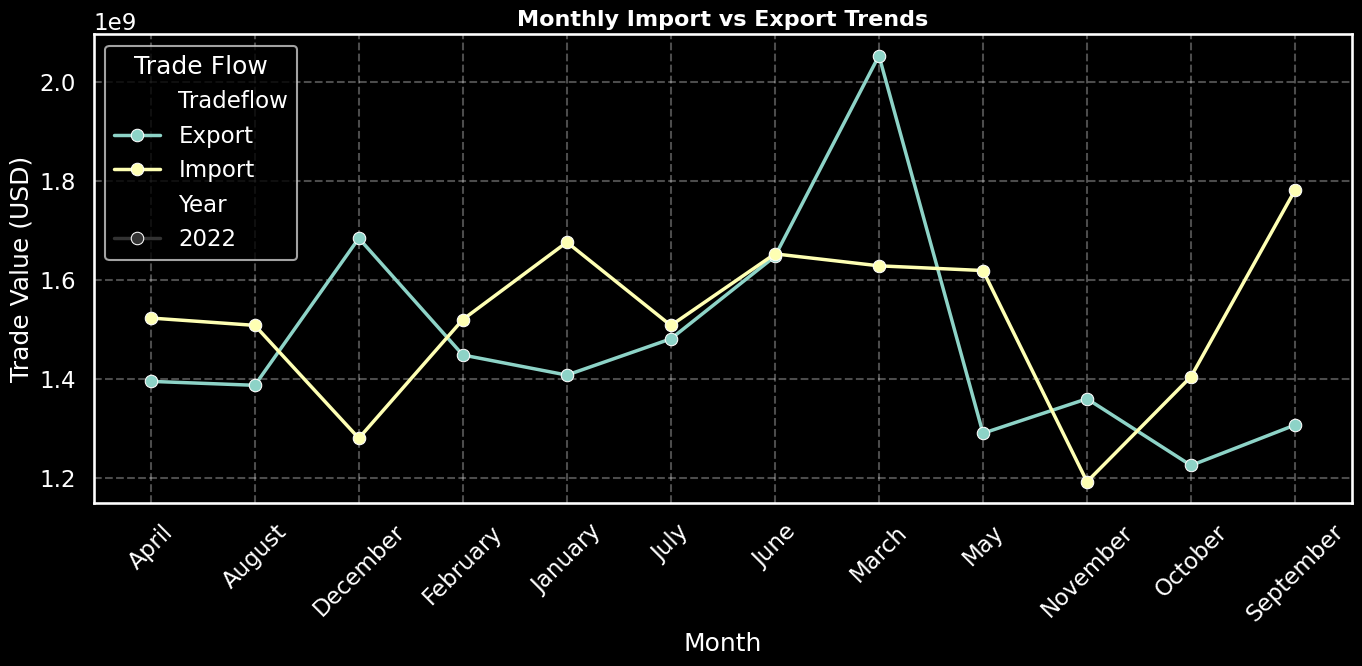

In [9]:
# Set dark theme aesthetics
sns.set_theme(style="darkgrid", palette="rocket")  # or "dark", "whitegrid", "ticks"
plt.style.use("dark_background")  # Set Matplotlib dark style

# Optional: customize fonts and grid
sns.set_context("talk")  # Bigger labels for presentation

# Create the plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_trend,
    x='Month',
    y='Tradevalue_USD',
    hue='Tradeflow',
    style='Year',
    markers=True,
    linewidth=2.5,
    marker='o'  # circle markers
)

# Title and labels
plt.title('Monthly Import vs Export Trends', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Trade Value (USD)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.legend(title='Trade Flow')
plt.show()

/tmp/ipython-input-10-3175577251.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


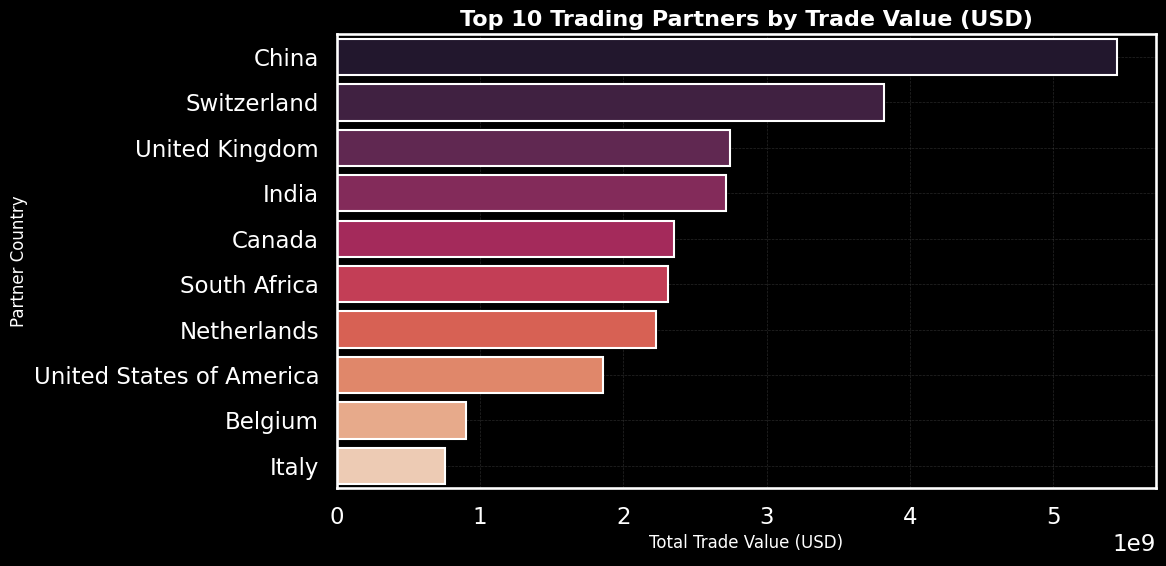

In [10]:
top_products = df.groupby('Description_HS2')['Tradevalue_USD'].sum().nlargest(10).reset_index()

# Set dark aesthetics
sns.set_theme(style="darkgrid")           # Grid but dark style
plt.style.use("dark_background")          # Set dark background for matplotlib
sns.set_context("talk")                   # Improve font sizes for presentation

# Prepare data
top_partners = df.groupby('Partner_Country')['Tradevalue_USD'].sum().nlargest(10).reset_index()

# Create barplot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_partners,
    y='Partner_Country',
    x='Tradevalue_USD',
    palette='rocket'  # high-contrast colormap good for dark bg
)

# Add titles and labels
plt.title('Top 10 Trading Partners by Trade Value (USD)', fontsize=16, weight='bold')
plt.xlabel('Total Trade Value (USD)', fontsize=12)
plt.ylabel('Partner Country', fontsize=12)

# Improve layout and appearance
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipython-input-11-1165922506.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


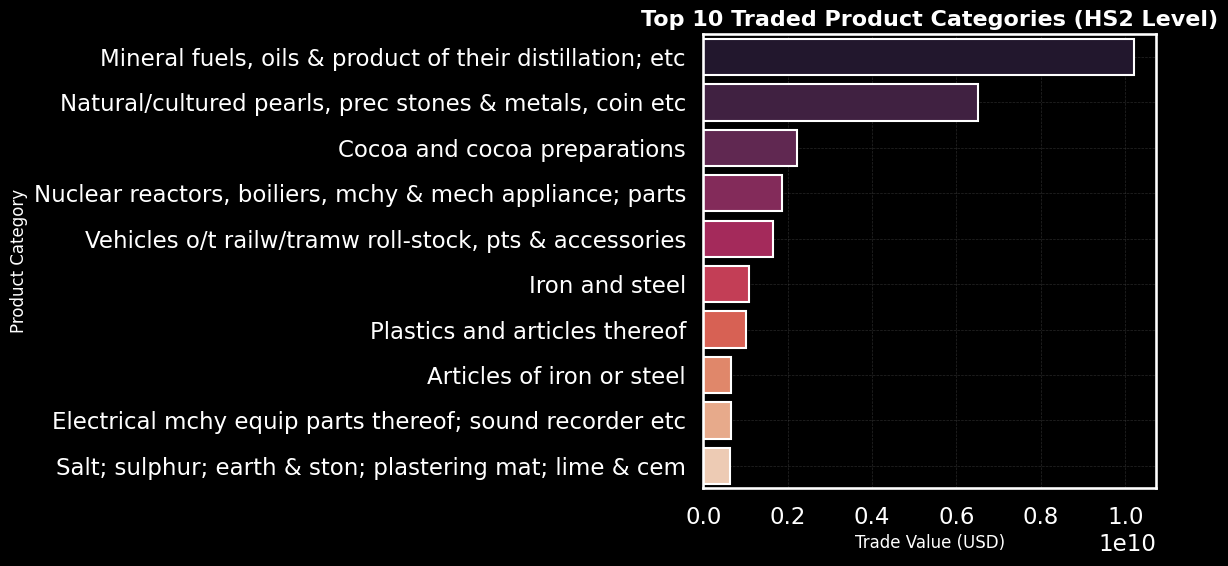

In [11]:
# Set dark theme and styling
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
sns.set_context("talk")

# Prepare data
top_products = df.groupby('Description_HS2')['Tradevalue_USD'].sum().nlargest(10).reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_products,
    y='Description_HS2',
    x='Tradevalue_USD',
    palette='rocket',  # visually exciting palette for dark backgrounds
    dodge=False,
    legend=False
)

# Add titles and labels
plt.title('Top 10 Traded Product Categories (HS2 Level)', fontsize=16, weight='bold')
plt.xlabel('Trade Value (USD)', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Refine grid and layout
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

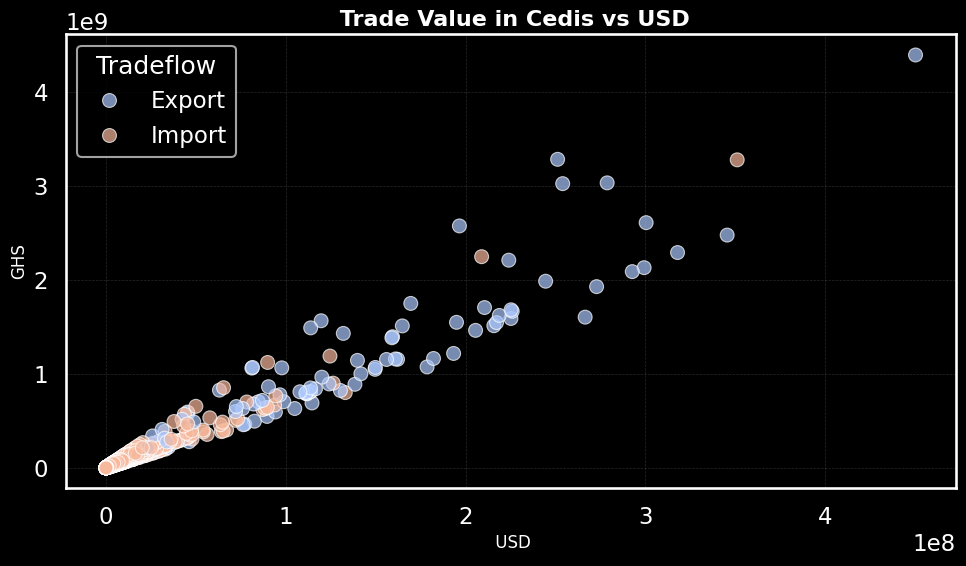

In [12]:
# Dark theme setup
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
sns.set_context("talk")

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Tradevalue_USD',
    y='Tradevalue_Cedis',
    hue='Tradeflow',
    palette='coolwarm',  # contrasting but vibrant on dark bg
    s=100,
    edgecolor='white',
    alpha=0.7
)

plt.title(' Trade Value in Cedis vs USD', fontsize=16, weight='bold')
plt.xlabel(' USD', fontsize=12)
plt.ylabel('GHS', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
plt.tight_layout()
plt.show()

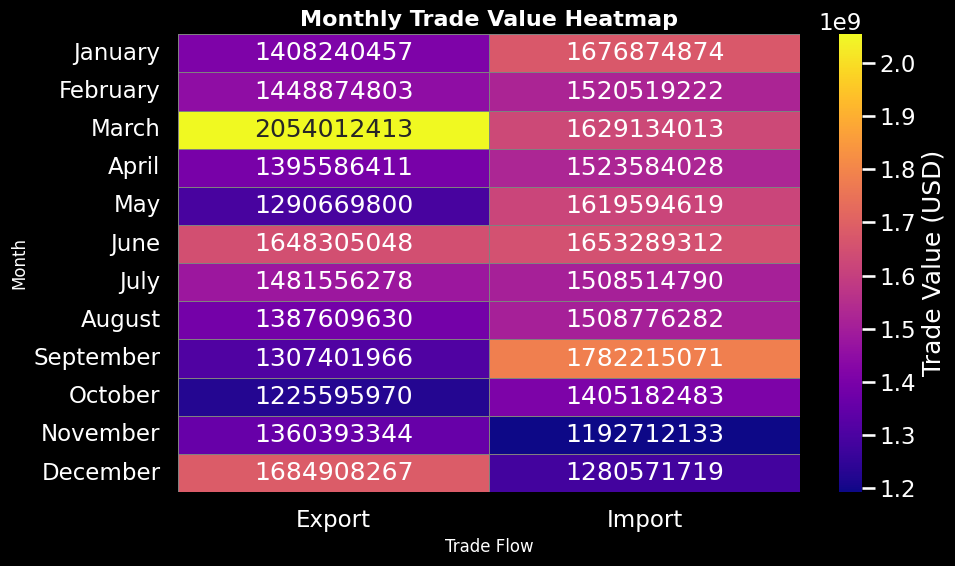

In [13]:
# Dark theme setup
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
sns.set_context("talk")

# Create pivot table
pivot = df.pivot_table(
    index='Month',
    columns='Tradeflow',
    values='Tradevalue_USD',
    aggfunc='sum'
)

# Sort months if not in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
pivot = pivot.reindex(month_order)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    cmap='plasma',  # High contrast on dark background
    annot=True,
    fmt=".0f",
    linewidths=0.4,
    linecolor='gray',
    cbar_kws={'label': 'Trade Value (USD)'}
)

plt.title("Monthly Trade Value Heatmap", fontsize=16, weight='bold')
plt.xlabel("Trade Flow", fontsize=12)
plt.ylabel("Month", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()